<a href="https://colab.research.google.com/github/MinGyeongdo/MultiLabel-foodimg-classification/blob/main/MobileNetv2%EA%B5%AC%ED%98%84_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. MobileNetV1?
**MoblilNets : Efficient Convoluation Neural networks for Mobile Vision Application**<br>
논문제목을 그대로 직역하면 모바일 비전 적용을 위한 효율적인 CNN으로써 Xception이 Convolution 과정을 통해 줄인 파라미터의 수만큼 층을 깊게 쌓아서 성능을 높이는데 중점을 두었다면 MobileNet은 모바일에서도 활용할 수 있게끔 성능을 최대한 살리면서 모델을 가볍게 만들고자하는 연구에서 개발된 모델입니다.
<br><br>
논문의 소개글에서 보면 어떠한 2개의 하이퍼파라미터를 설정하여 **Low latency** 모델을 만들면 임베디드나 모바일 비전에 적용하기 쉽게 설계가 가능하다는 것입니다.
<br><br>
섹션 2에서는 경량화 모델을 구축하기 위한 사전작업에 대한 리뷰를<br>
섹션 3에서는 모바일넷의 구조와 두 개의 하이퍼파라미터에 대한 내용을<br>
섹션 4에서는 이미지넷 에서의 실험 결과를<br>
섹션 5에서는 맺음말과 결론을 확인할 수 있습니다.<br>


## 1. 2. prior work
논문이 작성될 당시 기준으로는 작고 효율적인 신경망에 대해 관심도가 높았고, 이 방법에 대해서는 다양하게 제시되었다고 합니다.<br>


1.   pre-trained 모델을 압축시는 방법
2.   소규모 모델을 구축하여 직접 학습시키는 방법.


MobileNet에서는 latency에 대해 최적화에 대한 초점을 맞추고 있지만 소규모 네트워크를 구축하는 방법을 택했다고 합니다.<br>
MobileNet은 깊이에 따라 분리가 가능하게 설계했으며 인수분해된 컨볼루션층을 통해 연산량을 줄였다고 합니다.

## 1.3 MobileNet의 Architecture
모바일 넷의 핵심 층이 Depth wise Separable filter로 구현했다는 것이며, 이것에 대한 내용을 소개하고 있습니다.<br> 이 구조를 통해 하이퍼파라미터 수를 줄이고 연산량을 감소시켰다고 합니다.
### 1.3.1 Depthwise Separable Convolution
연산량을 줄이는 것에 핵심적인 역할을 한 Convolution층입니다.<br>
요약하면 단순히 필터링만 수행해주는 3x3의 Depthwise convolution층과 이를 선형결합하여 하나의 feature로서 생성해주는 1x1 pointwise covolution층으로 나누어 줌으로써 일반적인 convolution층에비해 연산량을 감소시켰다는 것입니다.<br> 이를 수학적으로 나타내면 다음과 같습니다. <br>
- Standard Convolution의 연산량
  - $ D_K*D_K*M*N*D_F*D_F$
- Depthwise Convolution의 연산량
  - $ D_K*D_K*M*D_F*D_F$
- Pointwise Convolution의 연산량
  - $ M*N*D_F*D_F$
- Depthwise Sperable Convolution의 연산량
  - $ D_K*D_K*M*D_F*D_F +  M*N*D_F*D_F$
- 감소한 연산량의 비
  - $ \frac{ D_K*D_K*M*D_F*D_F +  M*N*D_F*D_F}{D_K*D_K*M*N*D_F*D_F} = \frac{1}{N}+\frac{1}{D_k^2}$

여기서 $D_K$는 입력값의 크기, $M$은 입력값의 채널수, $D_F$는 피쳐맵의 크기, $N$는 출력값의 채널수를 의미합니다.
통상적으로 8~9배 정도 연산량이 감소했다고 합니다.


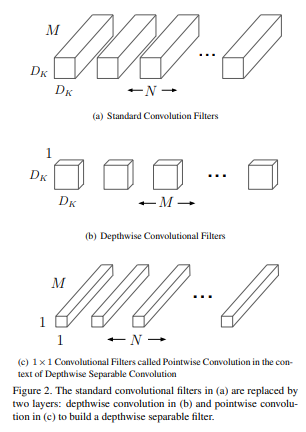

논문에서 발췌한 그림입니다. 개인적으로는 블로그에서 본 아래 그림이 잘 이해가 되었습니다.

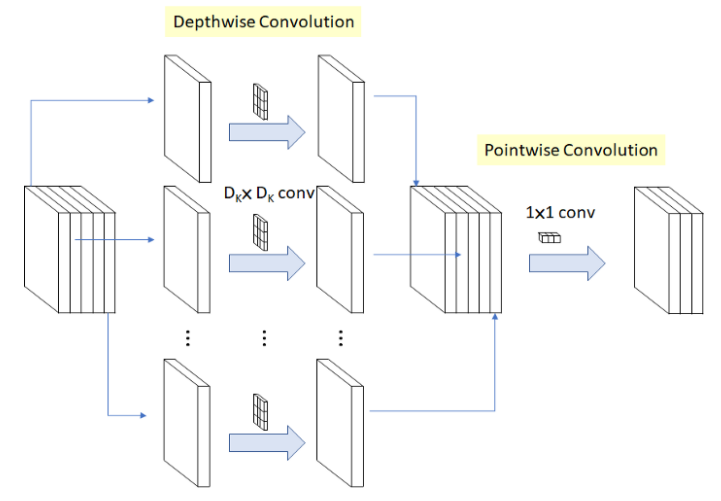

위 그림을 보면 Depthwise Convolution에서 각 입력 채널별로 구분하여 3x3 conv 필터가 각각의 연산을 수행하여 각 채널에 대한 피쳐맵을 생성하여 독립적인 saptial correlation을 계산하는 역할을 하게됩니다.<br>
그 다음 Pointwise conv에서는 각 피쳐맵을 결합하여 1x1 conv로 채널 수를 조정하여 모든 채널에 대해 연산을 진행합니다.<br>
MobileNet의 Depthwise separable convolution은 이러한 구조를 띄게됩니다.

### 1.3.2 Network Structure and Traning
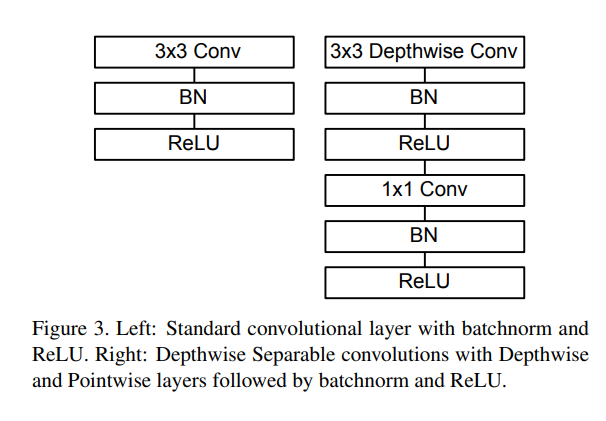

위 그림은 왼쪽은 Standard convolution layer이고 오른쪽은 Depthwise Separable convolution입니다.<br>
이 단락에서 이해한 내용은 모바일 넷은 어떤 구조로 형성 되어 있으며, 그 연구 결과에 대해 얘기하고 있습니다. 구조는 위 그림과 같으며 모바일넷의 대부분의 연산이 1X1 Conv 에서 이뤄지며 그런이유로 Depthwise Separable Conv layer에서 정규화나 가중치 감소와 같은 방법의 영향이 미미하다는 것입니다. 또한 소형 모델은 층이 깊지 않아서 과적합의 우려가 대형 모델보다 작다는 요소도 작용한다는 내용입니다.그리고 학습과정에서 인셉션 모델에서 사용한 기법인데 이미지의 크기를 제한 함으로써 왜곡되는 이미지의 양을 감소시켰다는 내용도 기재되어있습니다.<br>
아래 그림은 전체구조와 각 층에서 소모하는 자원을 테이블화한 그림입니다.<br>
본문에서도 언급했듯이 연산의 95퍼센트가 1x1 Conv에서 이뤄지며 75퍼센트의 파라미터가 있고, 나머지 약25퍼센트는 Fully connected layer에 있음을 확인할 수 있습니다.



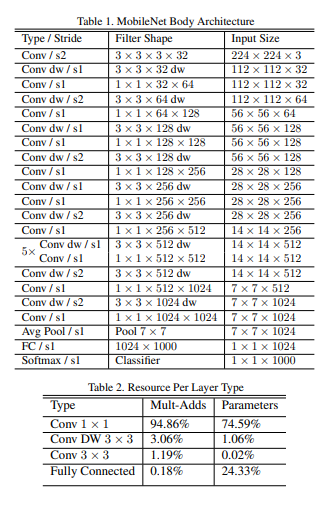

### 1.3.3 MobileNetv1 구현

In [28]:
import numpy as np
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D, BatchNormalization
from tensorflow.keras.layers import AvgPool2D, Flatten, Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
import tensorflow_datasets as tfds
import os
import tensorflow as tf

In [42]:
(x_train, y_train), (x_test, y_test) = tfds.as_numpy(tfds.load(
    'Cifar10',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))
y_train_tf = tf.one_hot(y_train,depth=10)
y_test_tf = tf.one_hot(y_test,depth=10)

In [30]:
# 모바일넷 블록

def mobilenet_block(x, filters, strides):
  
  # 3x3 Depthwise conv layer
  x = DepthwiseConv2D(kernel_size = 3, strides=strides, padding ='same')(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  # 1x1 Pointwise conv layer
  x = Conv2D(filters = filters, kernel_size = 1, strides = 1)(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  return x

In [34]:
# 입력층 부분 -> Depwiseconv2D층이 사용되지 않음.

input = Input(shape = (32,32,3), dtype=np.float32)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding='same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)

In [35]:
# 메인층 부분 -> Depwiseconv2D층이 사용

x = mobilenet_block(x, filters=64, strides=1)
x = mobilenet_block(x, filters=128, strides=2)
x = mobilenet_block(x, filters=128, strides=1)
x = mobilenet_block(x, filters=256, strides=2)
x = mobilenet_block(x, filters=256, strides=1)
x = mobilenet_block(x, filters=512, strides=2)
for i in range(5):
  x = mobilenet_block(x, filters=512, strides=1)
x = mobilenet_block(x, filters=1024, strides=2)
x = mobilenet_block(x, filters=1024, strides=1)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
#x = AvgPool2D(pool_size=1, strides=1,data_format='channels_first')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 batch_normalization_108 (Ba  (None, 16, 16, 32)       128       
 tchNormalization)                                               
                                                                 
 re_lu_108 (ReLU)            (None, 16, 16, 32)        0         
                                                                 
 depthwise_conv2d_54 (Depthw  (None, 16, 16, 32)       320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_109 (Ba  (None, 16, 16, 32)       128 

In [44]:
class_names = ['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

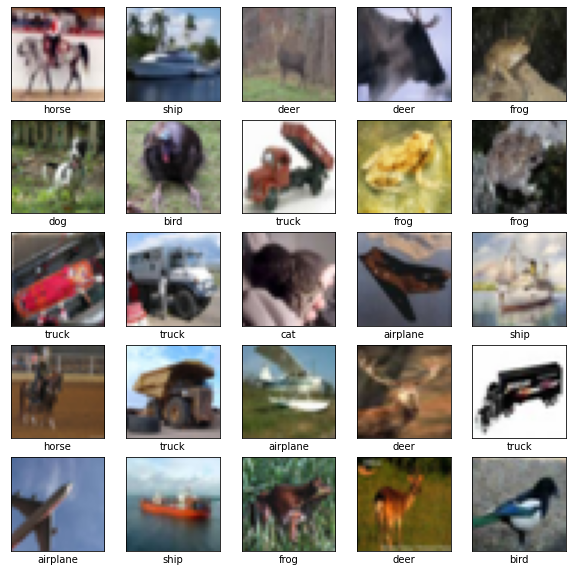

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[int(y_train[i])])
  plt.grid(False)
plt.show()

[케라스 손실함수 공식문서](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

In [36]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint, EarlyStopping

filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(30, 128)
checkpoint = ModelCheckpoint(filename,monitor='val_loss', verbose=1,save_best_only=True, mode='auto')
earlystopping = EarlyStopping(monitor='val_loss',patience=10)
reduceLR = ReduceLROnPlateau( monitor='val_loss',factor=0.5,patience=3,)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(x_train,y_train, batch_size=128, epochs=30, validation_split=0.1, callbacks=[reduceLR,checkpoint,earlystopping])

Epoch 1/30
349/352 [============================>.] - ETA: 0s - loss: 1.9643 - accuracy: 0.2713
Epoch 1: val_loss improved from inf to 2.34362, saving model to checkpoint-epoch-30-batch-128-trial-001.h5
352/352 [==============================] - 9s 17ms/step - loss: 1.9623 - accuracy: 0.2720 - val_loss: 2.3436 - val_accuracy: 0.0948 - lr: 0.0010
Epoch 2/30
349/352 [============================>.] - ETA: 0s - loss: 1.5895 - accuracy: 0.4149
Epoch 2: val_loss improved from 2.34362 to 1.84476, saving model to checkpoint-epoch-30-batch-128-trial-001.h5
352/352 [==============================] - 5s 15ms/step - loss: 1.5895 - accuracy: 0.4149 - val_loss: 1.8448 - val_accuracy: 0.2996 - lr: 0.0010
Epoch 3/30
351/352 [============================>.] - ETA: 0s - loss: 1.4004 - accuracy: 0.4915
Epoch 3: val_loss improved from 1.84476 to 1.60359, saving model to checkpoint-epoch-30-batch-128-trial-001.h5
352/352 [==============================] - 5s 16ms/step - loss: 1.4003 - accuracy: 0.4916 - v

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 2.5780 - accuracy: 0.6412 - 1s/epoch - 4ms/step

Test accuracy: 0.6412000060081482
